In [1]:
# 판다스 라이브러리
import pandas as pd

In [2]:
# 데이터 불러와서 변수에 담기
df = pd.read_csv('AB_NYC_2019.csv')

In [3]:
# csv파일로 저장하기
df.to_csv('airb.csv', index = False)

In [4]:
# 저장된 csv파일 불러와서 변수에 담기
dr = pd.read_csv('airb.csv')

In [5]:
# 파일복사
df = dr.copy()

In [6]:
# 결측치확인
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [7]:
# 결측치 삭제
df = df.drop('last_review', axis=1)

In [8]:
# 결측치 채우기
df['reviews_per_month'] = df['reviews_per_month'].fillna(0)

In [9]:
# 결측치 재확인
df.isnull().sum()

id                                 0
name                              16
host_id                            0
host_name                         21
neighbourhood_group                0
neighbourhood                      0
latitude                           0
longitude                          0
room_type                          0
price                              0
minimum_nights                     0
number_of_reviews                  0
reviews_per_month                  0
calculated_host_listings_count     0
availability_365                   0
dtype: int64

In [10]:
# 데이터 확인
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0.00,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


<Axes: >

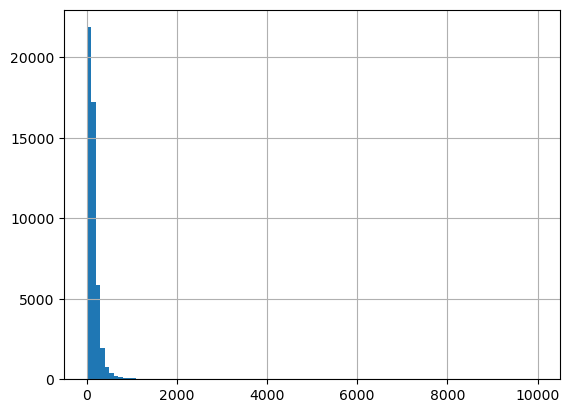

In [11]:
# target(hist) 확인
df['price'].hist(bins=100)

In [12]:
# 가격 값 복사
target = df['price']
df = df.drop('price', axis=1)

In [13]:
# 수치형 피처 선택

cols = [
    'host_id',
    'latitude',
    'longitude',
    'minimum_nights',
    'number_of_reviews',
    'reviews_per_month',
    'calculated_host_listings_count',
    'availability_365'
]

df = df[cols]
df

,host_id,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2787,40.64749,-73.97237,1,9,0.21,6,365
1,2845,40.75362,-73.98377,1,45,0.38,2,355
2,4632,40.80902,-73.94190,3,0,0.00,1,365
3,4869,40.68514,-73.95976,1,270,4.64,1,194
4,7192,40.79851,-73.94399,10,9,0.10,1,0
...,...,...,...,...,...,...,...,...
48890,8232441,40.67853,-73.94995,2,0,0.00,2,9
48891,6570630,40.70184,-73.93317,4,0,0.00,2,36
48892,23492952,40.81475,-73.94867,10,0,0.00,1,27
48893,30985759,40.75751,-73.99112,1,0,0.00,6,2


In [14]:
# 레이블 인코딩
from sklearn.preprocessing import LabelEncoder
lbe = LabelEncoder()
enc = 'host_id'
df[enc] = lbe.fit_transform(df[enc])
df

,host_id,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2,40.64749,-73.97237,1,9,0.21,6,365
1,3,40.75362,-73.98377,1,45,0.38,2,355
2,13,40.80902,-73.94190,3,0,0.00,1,365
3,14,40.68514,-73.95976,1,270,4.64,1,194
4,18,40.79851,-73.94399,10,9,0.10,1,0
...,...,...,...,...,...,...,...,...
48890,10255,40.67853,-73.94995,2,0,0.00,2,9
48891,8945,40.70184,-73.93317,4,0,0.00,2,36
48892,17488,40.81475,-73.94867,10,0,0.00,1,27
48893,19748,40.75751,-73.99112,1,0,0.00,6,2


In [15]:
# 검증데이터 분리
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    df, target, test_size=0.2, random_state=2022)

In [16]:
X_train.head()

,host_id,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
18854,28511,40.80167,-73.95781,3,3,0.09,2,0
12198,23825,40.76037,-73.99016,2,64,1.68,2,262
33932,1252,40.73001,-74.00562,60,1,0.20,1,0
1540,5917,40.69128,-73.93653,4,239,2.89,2,1
19709,12911,40.68899,-73.95555,28,0,0.00,1,0


In [17]:
# 머신러닝(회귀)
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

model = LinearRegression()
model.fit(X_train, y_train)
pred = model.predict(X_test)
mean_squared_error(y_test, pred)

52629.286237188295

In [18]:
# 릿지 회귀
from sklearn.linear_model import Ridge

model = Ridge()
model.fit(X_train, y_train)
pred = model.predict(X_test)
mean_squared_error(y_test, pred)

52629.05356396474

In [19]:
# 라쏘 회귀
from sklearn.linear_model import Lasso

model = Lasso()
model.fit(X_train, y_train)
pred = model.predict(X_test)
mean_squared_error(y_test, pred)

53196.02717517593

In [20]:
# 엘라스틱넷 회귀
from sklearn.linear_model import ElasticNet

model = ElasticNet()
model.fit(X_train, y_train)
pred = model.predict(X_test)
mean_squared_error(y_test, pred)

53905.52628675232

In [21]:
# 랜덤포레스트
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(random_state=2022)
model.fit(X_train, y_train)
pred = model.predict(X_test)
mean_squared_error(y_test, pred)

48518.64001562532

In [22]:
# Xgboost
from xgboost import XGBRegressor

model = XGBRegressor(
    max_depth=10,
    learning_rate=0.02,
    n_estimators=500,
    random_state=2022
)
model.fit(X_train, y_train)
pred = model.predict(X_test)
mean_squared_error(y_test, pred)

48855.63817516912